# EDT(EXPLORATORY DATA ANALYSIS)- INDIVIDUAL PROJECT - HENRY MLOPS

### Import needed libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import missingno as msno


C:\Users\angeo\AppData\Local\Temp\ipykernel_1752\3637452576.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


#### Loading dataset from ETL

In [2]:
df=pd.read_csv("Dataset/Cleaned_Dataset/steam_games.csv")## Load dataset from ETL analysis

#### Dataset view

In [3]:
df ## Dataset view

publisher      genres             app_name                title  \
0      Kotoshiro      Action  Lost Summoner Kitty  Lost Summoner Kitty   
1      Kotoshiro      Casual  Lost Summoner Kitty  Lost Summoner Kitty   
2      Kotoshiro       Indie  Lost Summoner Kitty  Lost Summoner Kitty   
3      Kotoshiro  Simulation  Lost Summoner Kitty  Lost Summoner Kitty   
4      Kotoshiro    Strategy  Lost Summoner Kitty  Lost Summoner Kitty   
...          ...         ...                  ...                  ...   
85623        NaN   Adventure          Maze Run VR                  NaN   
85624        NaN       Indie          Maze Run VR                  NaN   
85625        NaN      Action          Maze Run VR                  NaN   
85626        NaN  Simulation          Maze Run VR                  NaN   
85627        NaN          VR          Maze Run VR                  NaN   

                                                     url release_date  \
0      http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
1      http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
2      http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
3      http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
4      http://store.steampowered.com/app/761140/Lost_...   2018-01-04   
...                                                  ...          ...   
85623  http://store.steampowered.com/app/681550/Maze_...     SinFecha   
85624  http://store.steampowered.com/app/681550/Maze_...     SinFecha   
85625  http://store.steampowered.com/app/681550/Maze_...     SinFecha   
85626  http://store.steampowered.com/app/681550/Maze_...     SinFecha   
85627  http://store.steampowered.com/app/681550/Maze_...     SinFecha   

                                                    tags  \
0      ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
1      ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
2      ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
3      ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
4      ['Strategy', 'Action', 'Indie', 'Casual', 'Sim...   
...                                                  ...   
85623  ['Early Access', 'Adventure', 'Indie', 'Action...   
85624  ['Early Access', 'Adventure', 'Indie', 'Action...   
85625  ['Early Access', 'Adventure', 'Indie', 'Action...   
85626  ['Early Access', 'Adventure', 'Indie', 'Action...   
85627  ['Early Access', 'Adventure', 'Indie', 'Action...   

                                             reviews_url  \
0      http://steamcommunity.com/app/761140/reviews/?...   
1      http://steamcommunity.com/app/761140/reviews/?...   
2      http://steamcommunity.com/app/761140/reviews/?...   
3      http://steamcommunity.com/app/761140/reviews/?...   
4      http://steamcommunity.com/app/761140/reviews/?...   
...                                                  ...   
85623  http://steamcommunity.com/app/681550/reviews/?...   
85624  http://steamcommunity.com/app/681550/reviews/?...   
85625  http://steamcommunity.com/app/681550/reviews/?...   
85626  http://steamcommunity.com/app/681550/reviews/?...   
85627  http://steamcommunity.com/app/681550/reviews/?...   

                                                   specs price  early_access  \
0                                      ['Single-player']  4.99         False   
1                                      ['Single-player']  4.99         False   
2                                      ['Single-player']  4.99         False   
3                                      ['Single-player']  4.99         False   
4                                      ['Single-player']  4.99         False   
...                                                  ...   ...           ...   
85623  ['Single-player', 'Stats', 'Steam Leaderboards...  4.99          True   
85624  ['Single-player', 'Stats', 'Steam Leaderboards...  4.99          True   
85625  ['Single-player', 'Stats', 'Steam Leaderboards...  4.99          True   

#### Non-null count

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85628 entries, 0 to 85627
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     59439 non-null  object 
 1   genres        85490 non-null  object 
 2   app_name      85626 non-null  object 
 3   title         74981 non-null  object 
 4   url           85628 non-null  object 
 5   release_date  85628 non-null  object 
 6   tags          85490 non-null  object 
 7   reviews_url   85628 non-null  object 
 8   specs         83983 non-null  object 
 9   price         81935 non-null  object 
 10  early_access  85628 non-null  bool   
 11  id            85628 non-null  int64  
 12  developer     71572 non-null  object 
 13  year          74300 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 8.6+ MB


<Axes: >

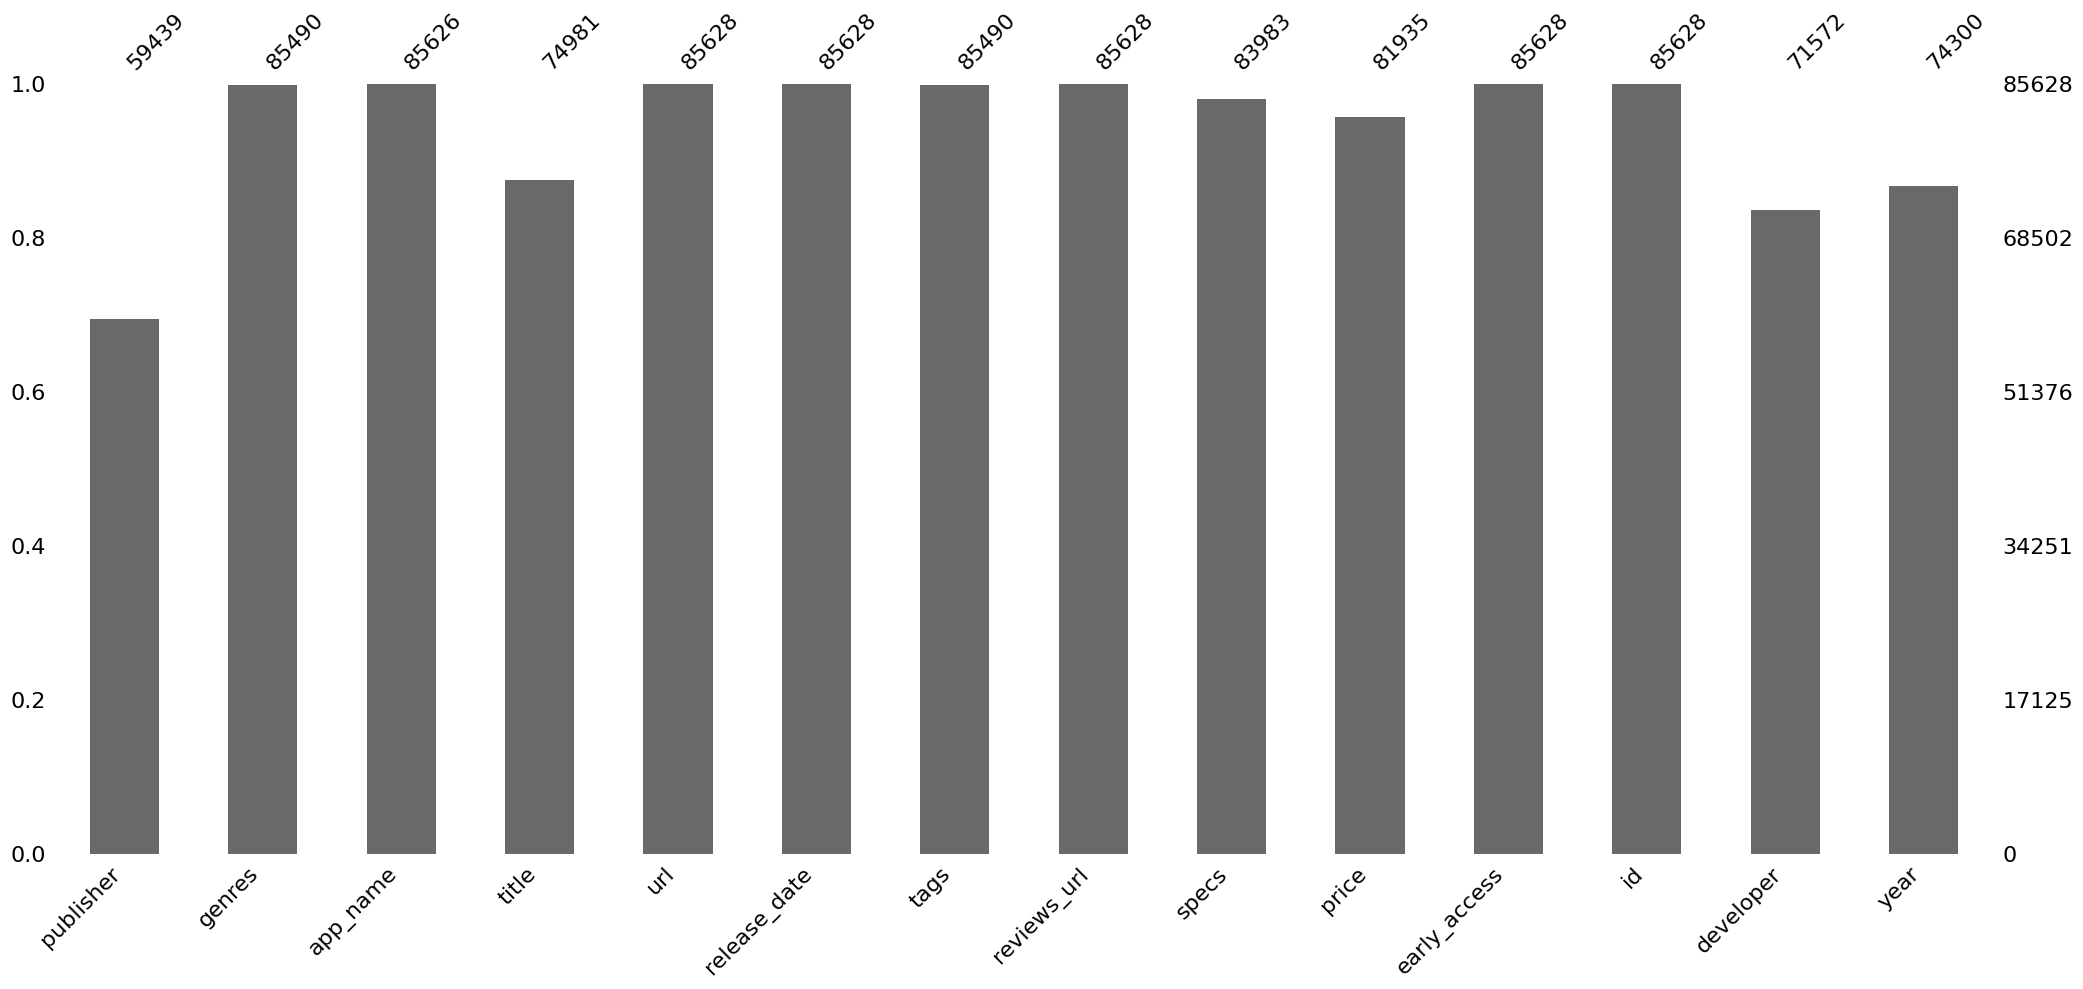

In [5]:
msno.bar(df)

#### Null count

In [6]:
df.isna().sum()

publisher       26189
genres            138
app_name            2
title           10647
url                 0
release_date        0
tags              138
reviews_url         0
specs            1645
price            3693
early_access        0
id                  0
developer       14056
year            11328
dtype: int64

<Axes: >

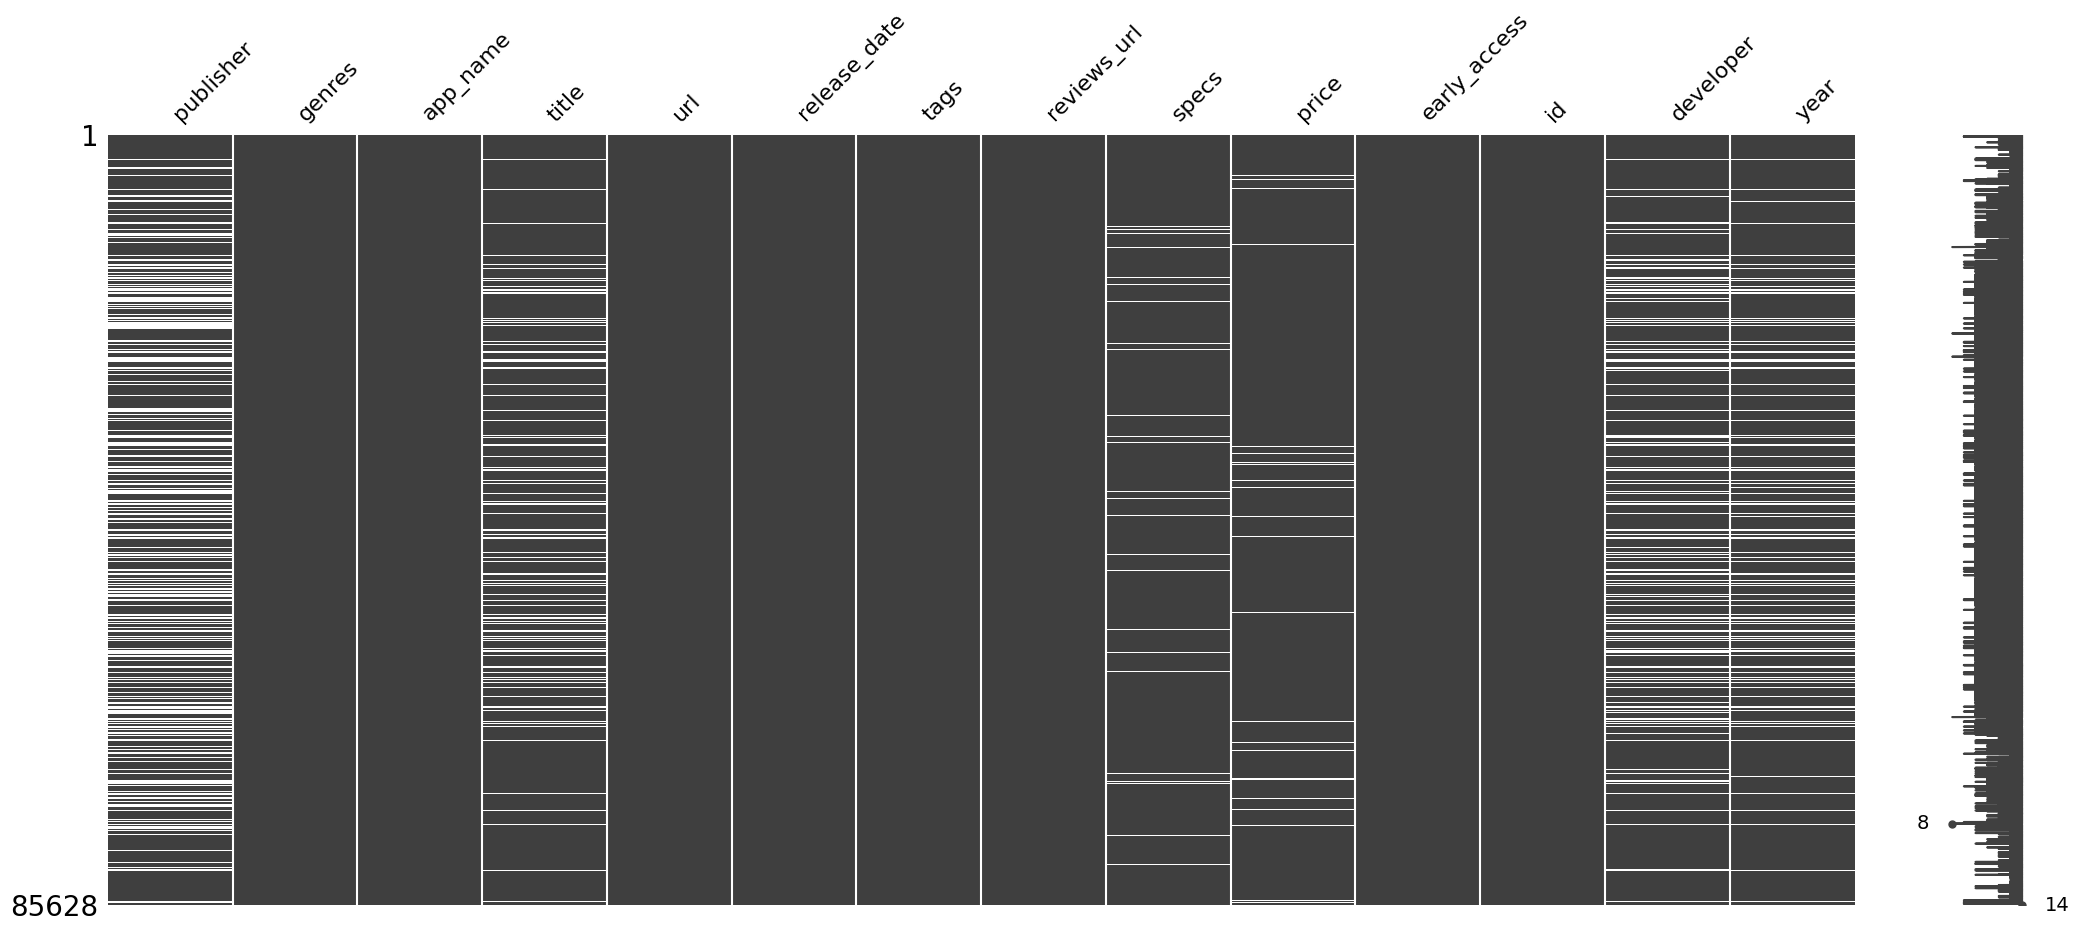

In [7]:
msno.matrix(df)

Text(0, 0.5, 'Number of games')

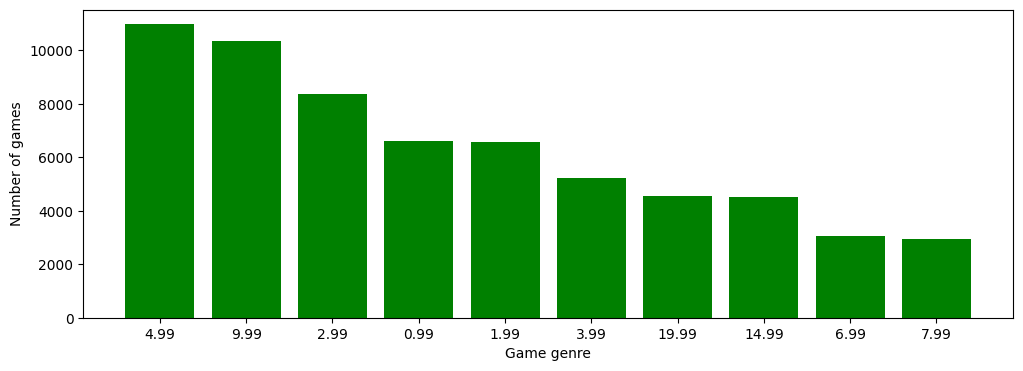

In [23]:
dale=pd.DataFrame(df.price.value_counts())## PLOT
dale.drop_duplicates(inplace=True)
dale.reset_index(inplace=True)
popular = dale.sort_values("count", ascending=False)
plt.figure(figsize=(12, 4))
plt.bar(popular["price"].head(10), popular["count"].head(10), align='center', color="green")
plt.gca()
plt.xlabel("Price")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

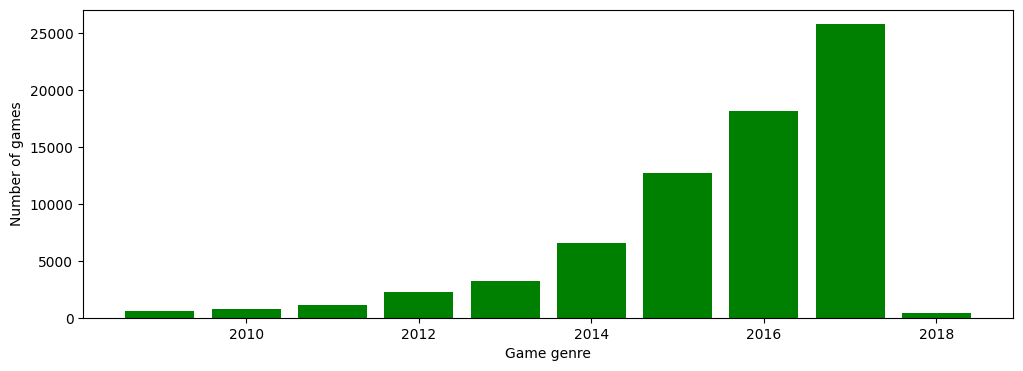

In [22]:
dale=pd.DataFrame(df.year.value_counts())## PLOT
dale.drop_duplicates(inplace=True)
dale.reset_index(inplace=True)
popular = dale.sort_values("count", ascending=False)
plt.figure(figsize=(12, 4))
plt.bar(popular["year"].head(10), popular["count"].head(10), align='center', color="green")
plt.gca()
plt.xlabel("Realease year")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

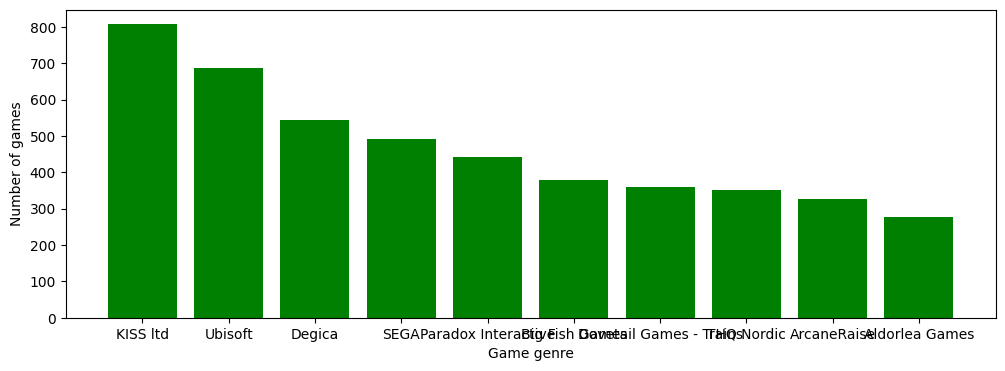

In [16]:
dale=pd.DataFrame(df.publisher.value_counts())## PLOT
dale.drop_duplicates(inplace=True)
dale.reset_index(inplace=True)
popular = dale.sort_values("count", ascending=False)
plt.figure(figsize=(12, 4))
plt.bar(popular["publisher"].head(10), popular["count"].head(10), align='center', color="green")
plt.gca()
plt.xlabel("Game genre")
plt.ylabel("Number of games")

Exploring what genres has more games.

Text(0, 0.5, 'Number of games')

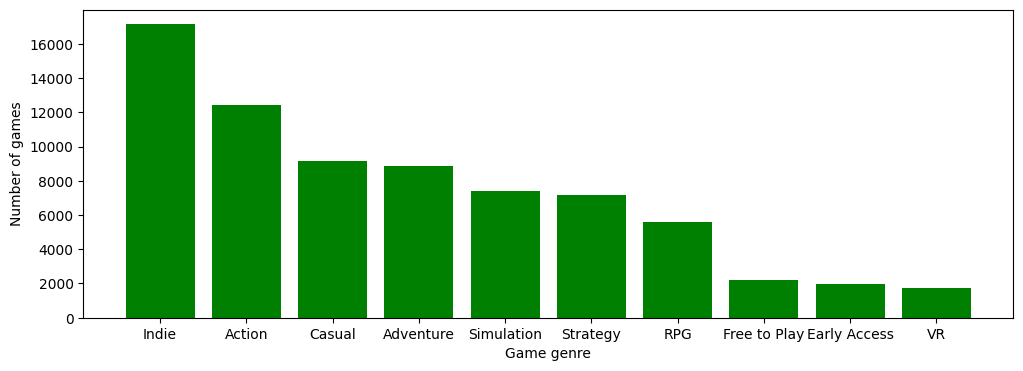

In [10]:
dale=pd.DataFrame(df.genres.value_counts())## PLOT
dale.reset_index(inplace=True)
popular = dale.sort_values("count", ascending=False)
plt.figure(figsize=(12, 4))
plt.bar(popular["genres"].head(10), popular["count"].head(10), align='center', color="green")
plt.gca()
plt.xlabel("Game genre")
plt.ylabel("Number of games")


### Words cloud

In [11]:
dft=pd.read_parquet("Dataset/Function_Dataset/MLF1.parquet")
texto = ""
for i in range(dft.shape[0]):
    texto = texto+" "+dft.features.iloc[i]## Concat titles 
quitar = ",;:.\n!\"'"
for caracter in quitar:
    texto = texto.replace(caracter,
                          "")## replace symbols by blank space
texto = texto.lower()
palabras = texto.split(" ")## Separate words by spaces

diccionario_frecuencias = {}
for palabra in palabras:## Create a dictionary with the count of the words
    if palabra in diccionario_frecuencias:
        diccionario_frecuencias[palabra] += 1
    else:
        diccionario_frecuencias[palabra] = 1


In [12]:
frecuencia=pd.DataFrame(data=diccionario_frecuencias, index=[0] )## Convert the dictionary to a dataframe
frecuencia=frecuencia.transpose()
frecuencia.reset_index(inplace=True)
frecuencia=frecuencia.sort_values(by=[0],ascending=False)

Text(0, 0.5, 'Words in titles')

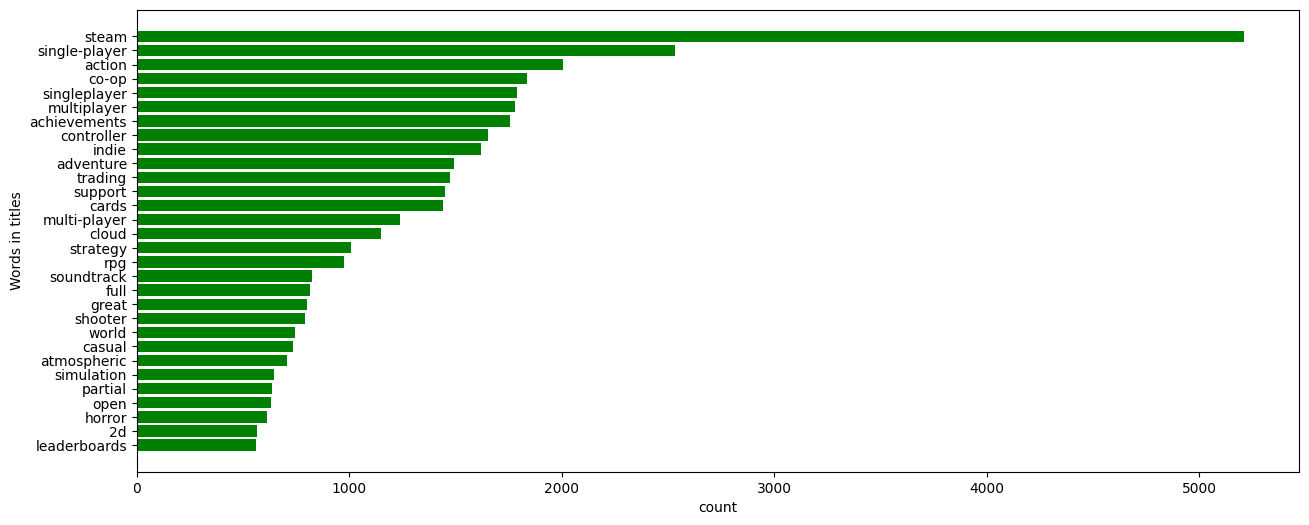

In [13]:
plt.figure(figsize=(15, 6))
plt.barh(frecuencia["index"].head(30), frecuencia[0].head(
    30), align='center', color="green")
plt.gca().invert_yaxis()
plt.xlabel("count")
plt.ylabel("Words in titles")

In [25]:
df1=pd.read_parquet("Dataset/Function_Dataset/F3-4-5.parquet")

Text(0, 0.5, 'Number of games')

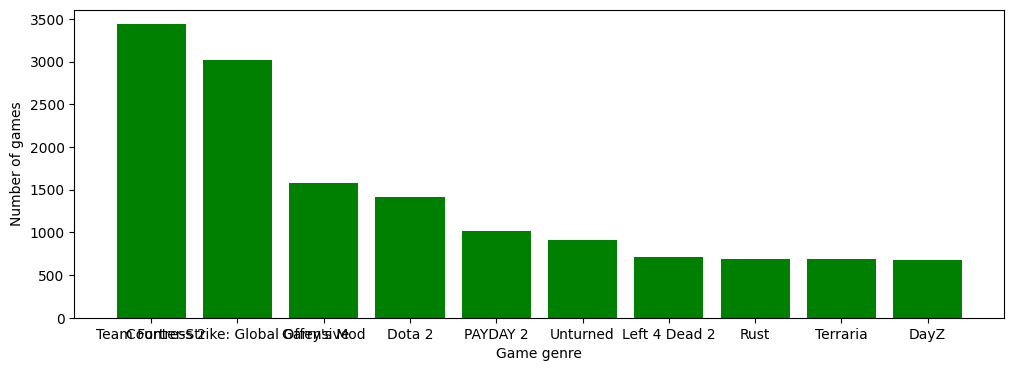

In [27]:
dale=pd.DataFrame(df1["app_name"].value_counts())## PLOT
dale.reset_index(inplace=True)
popular = dale.sort_values("count", ascending=False)
plt.figure(figsize=(12, 4))
plt.bar(popular["app_name"].head(10), popular["count"].head(10), align='center', color="green")
plt.gca()
plt.xlabel("Game genre")
plt.ylabel("Number of games")

#### Making an EDA report by PANDAS_PROFILING, Profile report

In [24]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)### Making a report
profile.to_file("output.html")  # Exporting the report to a file
profile  # Display the report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]